# **Importing Necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Reading the dataset**

In [2]:
data = pd.read_csv("/content/household_power_consumption.txt")
data

,Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0,16/12/2006;17:24:00;4.216;0.418;234.840;18.400...
1,16/12/2006;17:25:00;5.360;0.436;233.630;23.000...
2,16/12/2006;17:26:00;5.374;0.498;233.290;23.000...
3,16/12/2006;17:27:00;5.388;0.502;233.740;23.000...
4,16/12/2006;17:28:00;3.666;0.528;235.680;15.800...
...,...
262416,16/6/2007;23:00:00;0.946;0.186;240.780;4.000;0...
262417,16/6/2007;23:01:00;0.944;0.186;240.590;4.000;0...
262418,16/6/2007;23:02:00;0.942;0.184;240.170;4.000;0...
262419,16/6/2007;23:03:00;0.940;0.182;239.970;4.000;0...


# **Converting the dataset into a proper dataframe**

In [3]:
data = pd.read_csv(
    "/content/household_power_consumption.txt",
    sep=';',
    na_values='?',
    low_memory=False
)
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
262416,16/6/2007,23:00:00,0.946,0.186,240.78,4.0,0.0,1.0,0.0
262417,16/6/2007,23:01:00,0.944,0.186,240.59,4.0,0.0,2.0,0.0
262418,16/6/2007,23:02:00,0.942,0.184,240.17,4.0,0.0,1.0,0.0
262419,16/6/2007,23:03:00,0.940,0.182,239.97,4.0,0.0,2.0,0.0


# **Checking for Data Information**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262421 entries, 0 to 262420
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   262421 non-null  object 
 1   Time                   262421 non-null  object 
 2   Global_active_power    258649 non-null  float64
 3   Global_reactive_power  258649 non-null  float64
 4   Voltage                258648 non-null  float64
 5   Global_intensity       258648 non-null  float64
 6   Sub_metering_1         258648 non-null  float64
 7   Sub_metering_2         258648 non-null  float64
 8   Sub_metering_3         258648 non-null  float64
dtypes: float64(7), object(2)
memory usage: 18.0+ MB


In [5]:
print(data.isna().sum())
data.isna().mean()*100

Date                        0
Time                        0
Global_active_power      3772
Global_reactive_power    3772
Voltage                  3773
Global_intensity         3773
Sub_metering_1           3773
Sub_metering_2           3773
Sub_metering_3           3773
dtype: int64


,0
Date,0.000000
Time,0.000000
Global_active_power,1.437385
Global_reactive_power,1.437385
Voltage,1.437766
Global_intensity,1.437766
Sub_metering_1,1.437766
Sub_metering_2,1.437766
Sub_metering_3,1.437766


# **Dropping Empty Columns**

In [6]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258648 entries, 0 to 262419
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   258648 non-null  object 
 1   Time                   258648 non-null  object 
 2   Global_active_power    258648 non-null  float64
 3   Global_reactive_power  258648 non-null  float64
 4   Voltage                258648 non-null  float64
 5   Global_intensity       258648 non-null  float64
 6   Sub_metering_1         258648 non-null  float64
 7   Sub_metering_2         258648 non-null  float64
 8   Sub_metering_3         258648 non-null  float64
dtypes: float64(7), object(2)
memory usage: 19.7+ MB


# **Feature Engineering**

In [7]:
print()

In [8]:
data['Time'] = pd.to_datetime(data['Time'])
data['Date'] = pd.to_datetime(data['Date'])

/tmp/ipython-input-1148288830.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])
/tmp/ipython-input-1148288830.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [9]:
data['Time_sec'] = data['Time'].dt.hour*3600 + data['Time'].dt.minute*60 + data['Time'].dt.second

In [10]:
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['year'] = data['Date'].dt.year
data['dayofweek'] = data['Date'].dt.dayofweek

In [11]:
data.drop(["Date", "Time"], axis = 1, inplace=True)

# **Performing cyclical encoding on date and time**

In [12]:
data['Time_sin'] = np.sin(2 * np.pi * data['Time_sec'] / 86400)
data['Time_cos'] = np.cos(2 * np.pi * data['Time_sec'] / 86400)
data = data.drop("Time_sec", axis=1)

data['month_sin'] = np.sin(2 * np.pi * (data['month'] -1) / 12)
data['month_cos'] = np.cos(2 * np.pi * (data['month'] -1) / 12)

# **Performing cyclical encoding on day of the month for additional information**

In [13]:
import calendar

days_in_month = calendar.monthrange(data['year'].any(), data['month'].any())[1]
day_norm = (data['day'] - 1.0) / days_in_month
data['day_sin'] = np.sin(2*np.pi*day_norm)
data['day_cos'] = np.cos(2*np.pi*day_norm)

In [14]:
data.drop(["day", "month"], axis=1, inplace=True)

# **Lagging my Target variables**

Why i chose these kag values

*   lag_1 -> for 1 min ago
*   lag_5 -> for 5 mins ago
*   lag_60 -> for 5 mins ago
*   lag_1440 -> for the same time yesterday



In [15]:
data['lag_1']   = data['Global_active_power'].shift(1)
data['lag_5']  = data['Global_active_power'].shift(5)
data['lag_60'] = data['Global_active_power'].shift(60)
data['lag_1440'] = data['Global_active_power'].shift(1440)

# **Rolling my targert**

I chose 15mins and 60mins because

*   15 -> So it rolls the mean of electricity usage in the past 15 minutes
*   60 -> So it rolls the mean of electricity usage in the past 60 minutes  





In [16]:
data["Rollling_15min"] = data['Global_active_power'].shift(1).rolling(15).mean()
data["Rolling_60min"] = data['Global_active_power'].shift(1).rolling(60).mean()
data["Rolling_1hr"] = data['Global_active_power'].shift(1).rolling(60).std()

In [17]:
data = data.dropna()

# **Visualizing Linear correlation among features**

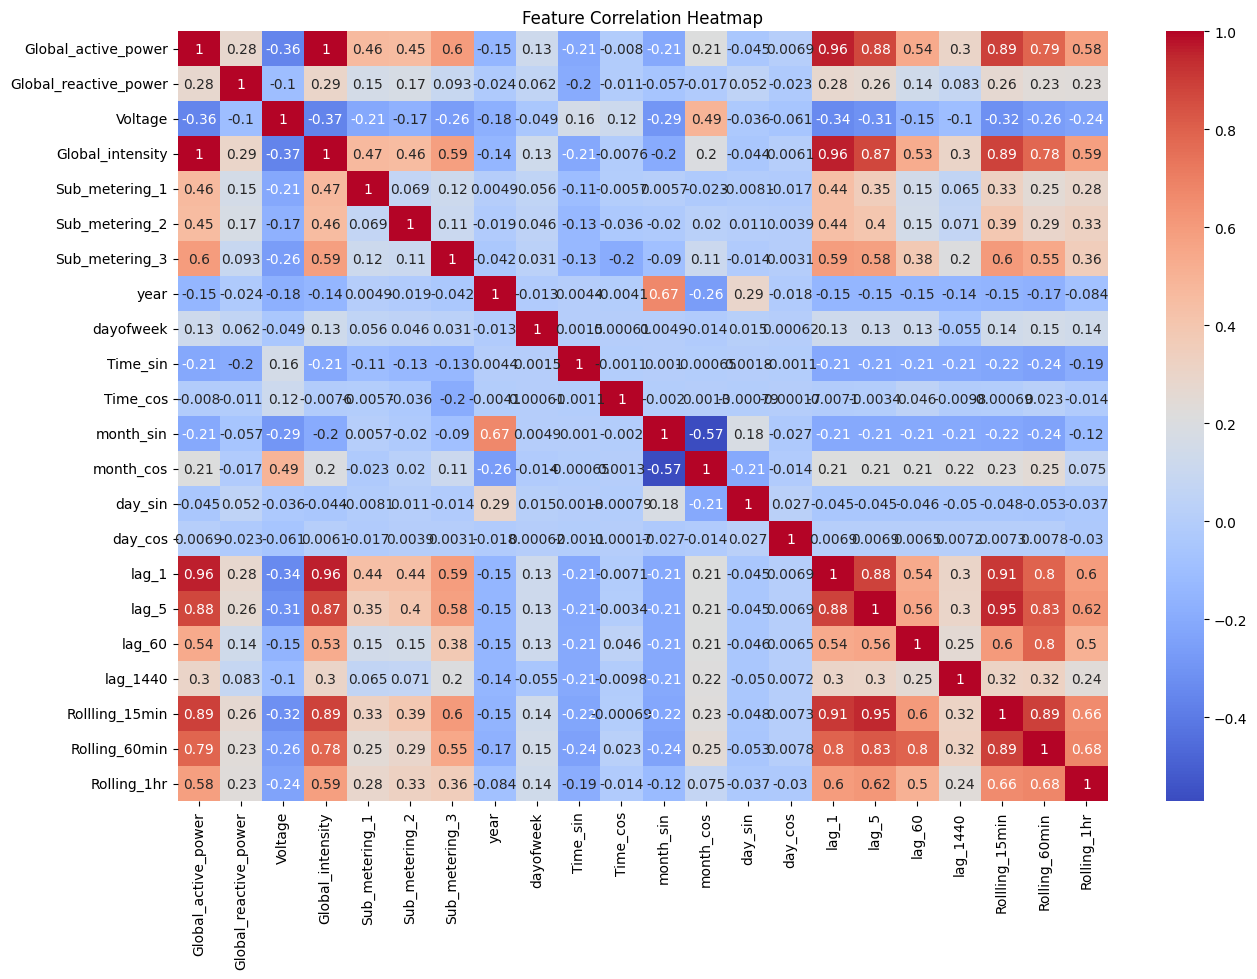

In [18]:
import seaborn as sns

corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

Conclusion: This visual shows that there exist a strong/intermediate linear correlation between the rolling/lag features and the target variable

# **Getting my Feature and Traget variable**

In [19]:
x = data.drop("Global_active_power", axis=1)
y = data['Global_active_power']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# **Model selection rationale**

Three regression models were selected to represent different modeling paradigms.

* Ridge Regression served as a linear baseline capable of handling multicollinearity.
* Random Forest was included as a bagging-based ensemble method to capture nonlinear relationships and provide a comparative benchmark against boosting-based models.
* LightGBM was selected as the primary model due to its efficiency, scalability, and strong performance on large datasets.






In [21]:
print()

# **Ridge Regression**

In [22]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
Ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=42))
])

Ridge_param = {
    'ridge__alpha': np.logspace(-3, 3, 20)
}
TsCv = TimeSeriesSplit(n_splits=3)
Ridge = RandomizedSearchCV(
    estimator=Ridge_pipeline,
    param_distributions=Ridge_param,
    n_iter=20,
    cv=TsCv,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

Ridge.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('ridge',
                                              Ridge(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'ridge__alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])},
                   random_state=42, scoring='r2', verbose=2)

In [23]:
print("Ridge Best Alpha:", Ridge.best_params_)
print("Ridge Best R2:", Ridge.best_score_)

Ridge Best Alpha: {'ridge__alpha': np.float64(0.001)}
Ridge Best R2: 0.9985167901146502


# **RandomForest Regressor**

In [24]:
from matplotlib import rc_params_from_file
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

TsCv = TimeSeriesSplit(n_splits=5)

model = RandomForestRegressor(
    random_state=1,
    n_jobs=-1

)
rf_params={
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}

RForest = GridSearchCV(
    estimator = model,
    param_grid = rf_params,
    cv=TsCv,
    n_jobs = -1,
    verbose = 2
)

RForest.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20], 'max_features': ['sqrt'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [25]:
print("Random Forest Best Alpha:", RForest.best_params_)
print("Random Forest R2:", RForest.best_score_)

Random Forest Best Alpha: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Random Forest R2: 0.9962791304015663


In [26]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

lgb_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)

LGB_param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, -1]
}
TsCv = TimeSeriesSplit(n_splits=5)
LGB_Model = GridSearchCV(estimator=lgb_model, param_grid=LGB_param_grid,
                           cv=TsCv, scoring='r2', n_jobs=-1, verbose=2)

LGB_Model.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3231
[LightGBM] [Info] Number of data points in the train set: 180045, number of used features: 21
[LightGBM] [Info] Start training from score 1.254516


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(n_jobs=-1, random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1],
                         'max_depth': [10, 20, -1],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [31, 50, 100]},
             scoring='r2', verbose=2)

In [27]:
print("Best params:", LGB_Model.best_params_)
print("Best R2:", LGB_Model.best_score_)

Best params: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 500, 'num_leaves': 50}
Best R2: 0.9995283710898836


# **Evaluating & Comparing metric values for each Model**

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [29]:
y_predRidge = Ridge.predict(x_test)
y_predRF = RForest.predict(x_test)
y_predLight = LGB_Model.predict(x_test)

In [30]:
Metric_Table = {
    "Metric/Model": ["Ridge", "Random Forest", "Light GBM"],
    "MAE": [mean_absolute_error(y_test, y_predRidge), mean_absolute_error(y_test, y_predRF), mean_absolute_error(y_test, y_predLight)],
    "MSE": [mean_squared_error(y_test, y_predRidge), mean_squared_error(y_test, y_predRF), mean_squared_error(y_test, y_predLight)],
    "RMSE": [root_mean_squared_error(y_test, y_predRidge), root_mean_squared_error(y_test, y_predRF), root_mean_squared_error(y_test, y_predLight)]
}
Metric_Table = pd.DataFrame(Metric_Table)

In [31]:
Metric_Table

,Metric/Model,MAE,MSE,RMSE
0,Ridge,0.029119,0.002210,0.047005
1,Random Forest,0.022944,0.003844,0.062004
2,Light GBM,0.012732,0.000556,0.023583


# **Conclusion :**
Among the evaluated models, LightGBM consistently outperformed Ridge Regression and Random Forest across all evaluation metrics (MAE, MSE, and RMSE). The significantly lower RMSE indicates better stability and fewer large prediction errors, which is critical for electricity demand forecasting. Therefore, LightGBM was selected as the final model.

# **Saving My model to joblib**

In [32]:
from joblib import dump,load
dump(LGB_Model, "Electricity_model.joblib")

['Electricity_model.joblib']

# **THE END**